In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn


In [2]:
df = pd.read_csv('../data/pima_indians_diabetes.csv')
print (df.describe(include='all'))

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [3]:
from sklearn.cross_validation import train_test_split
import matplotlib as mpl
import seaborn as sns

train,test = train_test_split(df,test_size=0.2,random_state=999)

<h2>Exploratory Data Analysis</h2>

In [4]:
con = df.columns.values
con_variables = train[con]
print con
len(con)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


9

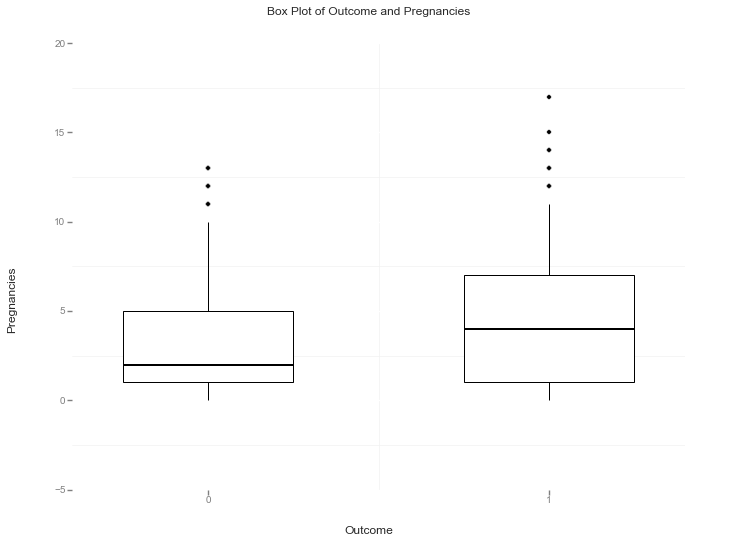

<ggplot: (12884147)>


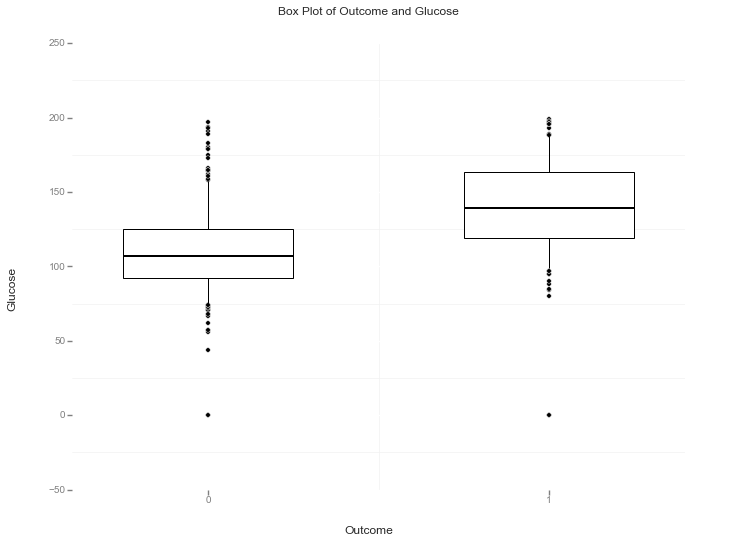

<ggplot: (15510451)>


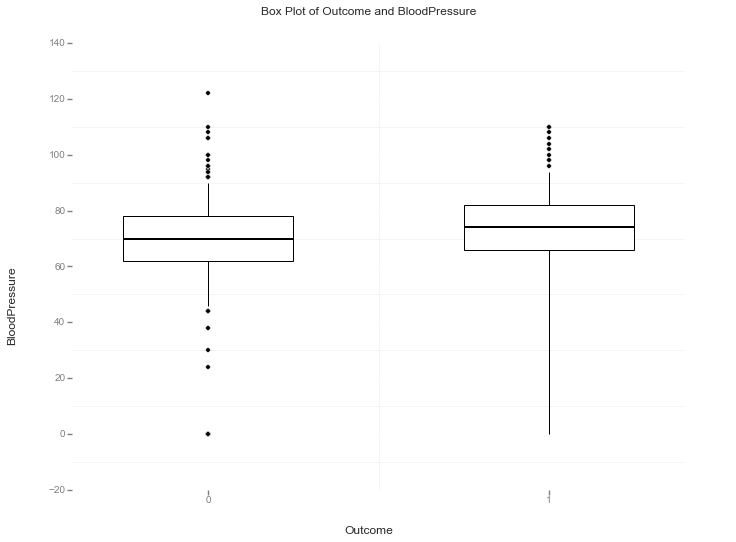

<ggplot: (12700132)>


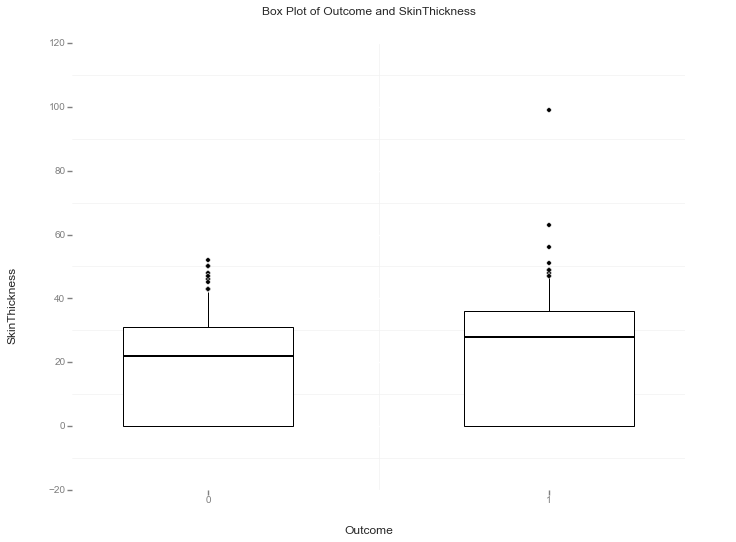

<ggplot: (12278146)>


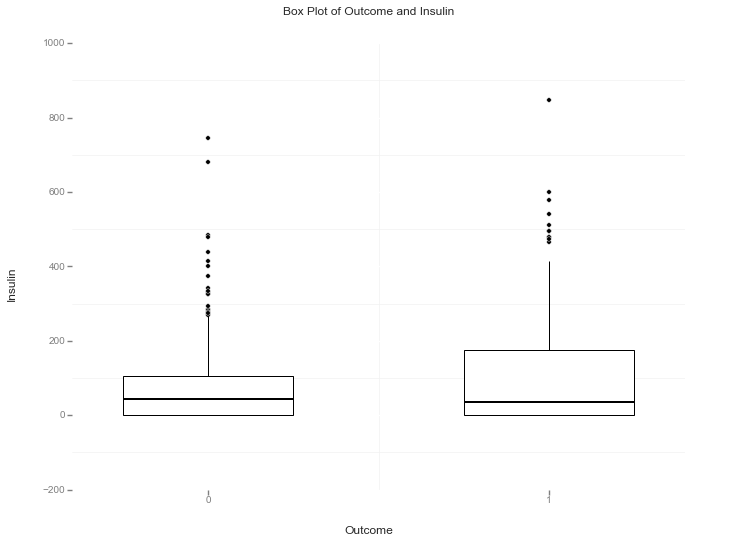

<ggplot: (12671282)>


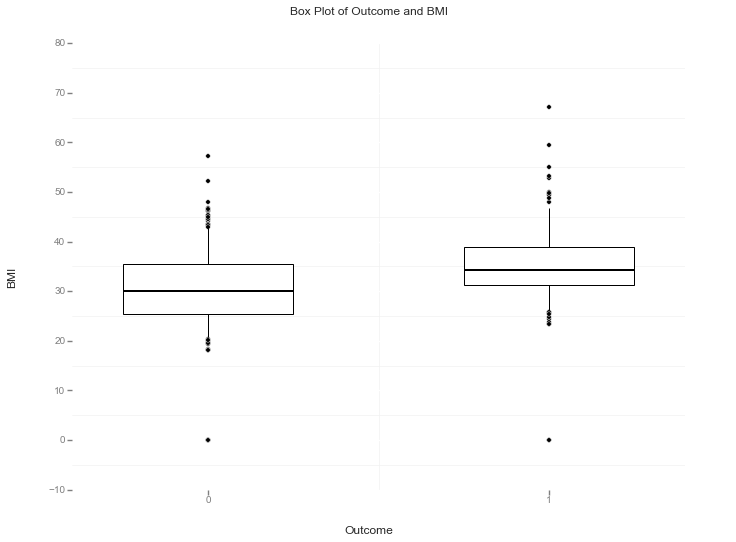

<ggplot: (15439813)>


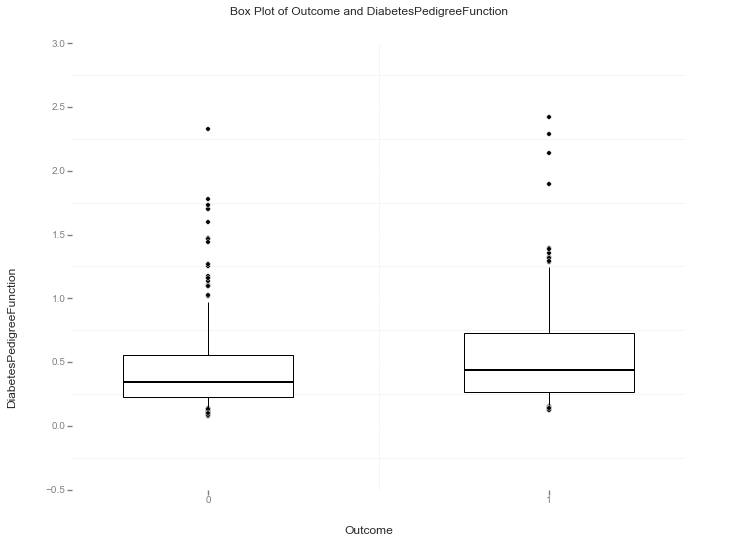

<ggplot: (12734254)>


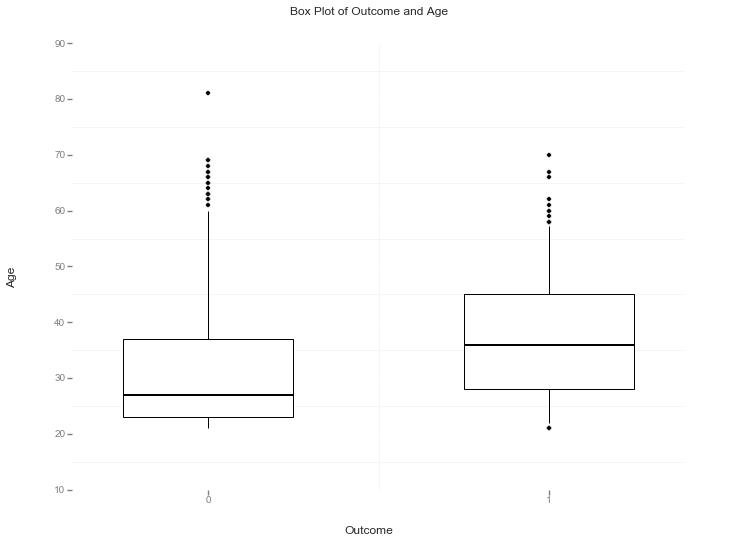

<ggplot: (12433507)>


In [5]:
for i in range(len(con)-1):
    g= ggplot(con_variables,aes(x= 'Outcome',y=con[i])) + geom_boxplot() + ggtitle('Box Plot of Outcome and '+con[i])+theme_bw()
    print(g)

In [6]:
Cor = con_variables.iloc[:,0:(len(con)-1)]
Cor_matrxi = Cor.corr(method='pearson', min_periods=1)
print(Cor_matrxi)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.124620       0.129749      -0.117944   
Glucose                      0.124620  1.000000       0.165868       0.064194   
BloodPressure                0.129749  0.165868       1.000000       0.198289   
SkinThickness               -0.117944  0.064194       0.198289       1.000000   
Insulin                     -0.074889  0.351370       0.089736       0.423777   
BMI                         -0.012604  0.216654       0.297008       0.427182   
DiabetesPedigreeFunction    -0.045816  0.140142       0.038643       0.174554   
Age                          0.552343  0.269606       0.275063      -0.129427   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.074889 -0.012604                 -0.045816   
Glucose                   0.351370  0.216654                  0.140142   
BloodPressure             0.089736  0.297008    

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

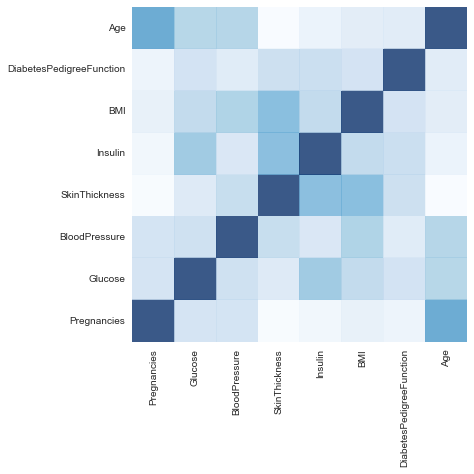

In [7]:


fig, ax = plt.subplots()
heatmap = ax.pcolor(Cor_matrxi, cmap=plt.cm.Blues, alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(6, 6)
ax.set_frame_on(False)
ax.set_yticks(np.arange((len(con)-1)) + 0.5, minor=False)
ax.set_xticks(np.arange((len(con)-1)) + 0.5, minor=False)
ax.set_xticklabels(con[0:(len(con)-1)], minor=False)
ax.set_yticklabels(con[0:(len(con)-1)], minor=False)
plt.xticks(rotation=90)



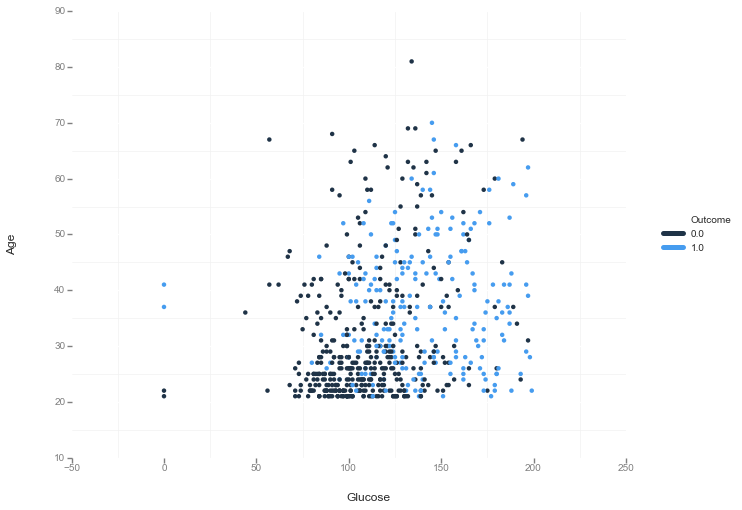

<ggplot: (15587181)>


In [8]:
g = ggplot(con_variables, aes(x='Glucose',y='Age',color='Outcome'))+geom_point() +theme_bw()
print (g)

<h2>Feature Selection</h2>

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
features = train.iloc[:,0:(len(con)-1)]
label = train['Outcome']
clf = ExtraTreesClassifier()
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(features)

#print features
print(New_features)
print(New_features.shape)

[[ 112.    25.    24. ]
 [  93.    43.4   35. ]
 [ 128.    40.    24. ]
 ..., 
 [ 123.    35.2   29. ]
 [  99.    21.8   26. ]
 [ 104.    33.6   22. ]]
(614L, 3L)


<h2>Model Fit</h2>

In [10]:

train_features = features
test_features = test.iloc[:,0:(len(con)-1)]

#train_features = New_features
#test_features = model.transform(test_features)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
Classifiers = [DecisionTreeClassifier(),LogisticRegression(C=0.000000001,solver='liblinear',max_iter=2000),RandomForestClassifier(n_estimators=1000,max_depth=7)]



In [11]:
from sklearn.metrics import accuracy_score
Model = []
Accuracy = []
for clf in Classifiers:
    fit=clf.fit(train_features,label)
    pred=fit.predict(test_features)
    Model.append(clf.__class__.__name__)
    Accuracy.append(accuracy_score(test['Outcome'],pred))
    print('Accuracy of '+clf.__class__.__name__ +' is '+str(accuracy_score(test['Outcome'],pred)))

Accuracy of DecisionTreeClassifier is 0.707792207792
Accuracy of LogisticRegression is 0.655844155844
Accuracy of RandomForestClassifier is 0.772727272727


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['Outcome'],pred)

array([[87, 14],
       [21, 32]])

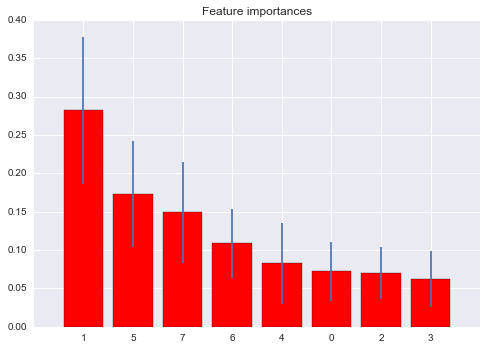

In [13]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), indices)
plt.xlim([-1, train_features.shape[1]])
plt.show()